In [19]:
import sys
sys.path.append("..")

import numpy as np
import jax.numpy as jnp
import jax
import scipy.linalg
import scipy.optimize
import matplotlib.pyplot as plt

import pyequion2
import tmcdiff.builder

In [20]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
eqsys = pyequion2.EquilibriumBackend(["Na", "Cl", "Ca", "C"], from_elements=True, backend="jax", logbase="e")

In [25]:
builder = tmcdiff.builder.FixedGridTransportBuilder(eqsys,
                                                    298.15,
                                                    0.1,
                                                    1e-6,
                                                    jnp.array([65, 56, 75.0, 28.0, 0.0]), ["Calcite"])
builder.set_species(['CaCO3', 'CaHCO3+', 'CaOH+', 'Na2CO3', 'NaCO3-', 'NaHCO3', 'NaOH', 'CaOH+',
                     'H+', 'OH-'])
builder.make_grid(10, 5)
builder.set_initial_guess()
builder.species

['CO2', 'CO3--', 'Ca++', 'Cl-', 'HCO3-', 'Na+']

In [23]:
# eqsysfront = pyequion2.EquilibriumSystem(["Na", "Cl", "Ca", "C"], from_elements=True)
# balance = {'Na': 75.0, 'Cl':56.0, 'Ca':28.0, 'C':65.0}
# sol, _ = eqsysfront.solve_equilibrium_mixed_balance(298.15, molal_balance=balance)
# {spec: np.log(sol.molals[spec]) for spec in builder.species}

In [24]:
sol, sol_simple = builder.solve()

298.15
298.15


ValueError: array must not contain infs or NaNs

In [112]:
sol.success

True

In [113]:
c = np.exp(builder.logc)

Text(0.5, 0, '$y^+$')

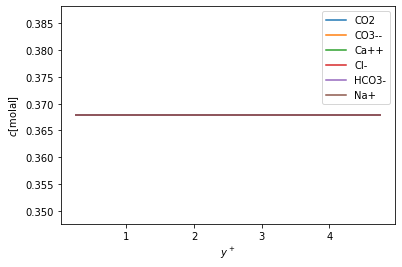

In [114]:
plt.figure()
for i in range(builder.nspecies):
    plt.plot(builder.ygrid, c[i, :], label=builder.species[i])
plt.legend()
plt.ylabel(r'$c$[molal]')
plt.xlabel(r'$y^+$')

In [91]:
def f(cbulk):
    builder.cbulk = cbulk
    _, _ = builder.solve()
    dc = builder.fluxes()[:, -1:]
    dt = 1e-2
    return 4/dt*dc

In [56]:
f(jnp.array([65, 56, 75.0, 28.0, 0.0]))

DeviceArray([[-15.133566 ],
             [ -8.9779005],
             [ -1.6318988],
             [ -2.0280852],
             [-12.711183 ]], dtype=float32)

DeviceArray([[ 0,  0,  1,  0,  0,  0],
             [ 1,  1,  0,  0,  1,  0],
             [ 0,  0,  0,  1,  0,  0],
             [ 0,  0,  0,  0,  0,  1],
             [ 0, -2,  2, -1, -1,  1]], dtype=int32)